In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [29]:
may_polls_df = pd.read_csv("may_polls/president_polls_rtw.csv")


In [4]:
display(may_polls_df.describe())
display(may_polls_df.describe(include=['O']))

,poll_id,pollster_id,pollster_rating_id,numeric_grade,pollscore,transparency_score,sponsor_candidate_id,endorsed_candidate_id,endorsed_candidate_name,endorsed_candidate_party,...,sample_size,subpopulation,source,race_id,cycle,seat_number,seat_name,ranked_choice_round,candidate_id,pct
count,8292.000000,8292.000000,8292.000000,7473.000000,7473.000000,5083.000000,265.000000,0.0,0.0,0.0,...,8234.000000,0.0,201.0,8292.000000,8292.0,8292.0,0.0,0.0,8292.000000,8292.000000
mean,84221.580680,1213.317535,323.193319,2.167777,-0.389843,6.225654,28976.943396,NaN,NaN,NaN,...,1773.464416,NaN,538.0,8881.076459,2024.0,0.0,NaN,NaN,20151.465630,36.567369
std,2476.103134,479.262259,206.191408,0.622527,0.657602,2.333903,5052.756949,NaN,NaN,NaN,...,1796.513570,NaN,0.0,50.184474,0.0,0.0,NaN,NaN,5077.439929,14.087017
min,74681.000000,26.000000,3.000000,0.500000,-1.500000,1.000000,16651.000000,NaN,NaN,NaN,...,111.000000,NaN,538.0,8749.000000,2024.0,0.0,NaN,NaN,16638.000000,0.000000
25%,82878.000000,1102.000000,195.000000,1.800000,-1.100000,4.000000,31042.000000,NaN,NaN,NaN,...,815.000000,NaN,538.0,8857.000000,2024.0,0.0,NaN,NaN,16651.000000,36.000000
50%,84654.000000,1189.000000,251.000000,1.900000,-0.200000,6.000000,31042.000000,NaN,NaN,NaN,...,1101.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,19368.000000,41.600000
75%,86276.000000,1585.250000,448.000000,2.800000,-0.100000,9.000000,31042.000000,NaN,NaN,NaN,...,1961.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,19368.000000,44.000000
max,86952.000000,1873.000000,845.000000,3.000000,1.700000,10.000000,31126.000000,NaN,NaN,NaN,...,26230.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,31818.000000,67.600000


,pollster,sponsor_ids,sponsors,display_name,pollster_rating_name,methodology,state,start_date,end_date,sponsor_candidate,...,notes,url,internal,partisan,office_type,election_date,stage,party,answer,candidate_name
count,8292,3602,3602,8292,8292,8092,3357,8292,8292,265,...,121,8290,607,604,8292,8292,8292,8292,8292,8292
unique,156,170,170,156,148,43,53,718,719,9,...,14,1127,2,4,1,1,1,7,46,47
top,Morning Consult,96,Bloomberg,Morning Consult,Morning Consult,Online Panel,Michigan,4/13/24,4/21/24,Robert F. Kennedy,...,split sample,https://pro.morningconsult.com/trackers/2024-p...,False,REP,U.S. President,11/5/24,general,DEM,Biden,Joe Biden
freq,1497,301,301,1497,1497,4386,348,213,214,204,...,38,540,340,288,8292,8292,8292,3466,3184,3184


In [30]:
may_polls_df.dtypes

poll_id                        int64
pollster_id                    int64
pollster                      object
sponsor_ids                   object
sponsors                      object
display_name                  object
pollster_rating_id             int64
pollster_rating_name          object
numeric_grade                float64
pollscore                    float64
methodology                   object
transparency_score           float64
state                         object
start_date                    object
end_date                      object
sponsor_candidate_id         float64
sponsor_candidate             object
sponsor_candidate_party       object
endorsed_candidate_id        float64
endorsed_candidate_name      float64
endorsed_candidate_party     float64
question_id                    int64
sample_size                  float64
population                    object
subpopulation                float64
population_full               object
tracking                      object
c

In [20]:
# convert date vraibles to date object
may_polls_df['start_date'] = pd.to_datetime(may_polls_df['start_date'], format='%Y%m%d',errors = 'coerce')
may_polls_df['end_date'] = pd.to_datetime(may_polls_df['end_date'], format='%Y%m%d',errors = 'coerce')

In [16]:
top_5_candidates = may_polls_df['candidate_name'].value_counts().head(5)
print(top_5_candidates)


candidate_name
Joe Biden            3184
Donald Trump         2758
Robert F. Kennedy     607
Ron DeSantis          466
Cornel West           342
Name: count, dtype: int64


In [37]:
top_5_candidates = ["Joe Biden", "Donald Trump", "Robert F. Kennedy", "Ron DeSantis", "Cornel West"]
top_poll_df = may_polls_df[may_polls_df['candidate_name'].isin(top_5_candidates)]
trend_df = top_poll_df.groupby(['candidate_name', 'end_date'])['pct'].mean().reset_index()

In [38]:
trend_df

,candidate_name,end_date,pct
0,Cornel West,2023-06-20,5.8
1,Cornel West,2023-06-29,4.0
2,Cornel West,2023-07-12,2.1
3,Cornel West,2023-07-24,5.5
4,Cornel West,2023-08-02,4.0
...,...,...,...
1949,Ron DeSantis,2024-01-13,39.0
1950,Ron DeSantis,2024-01-17,42.0
1951,Ron DeSantis,2024-01-18,42.0
1952,Ron DeSantis,2024-01-23,38.0


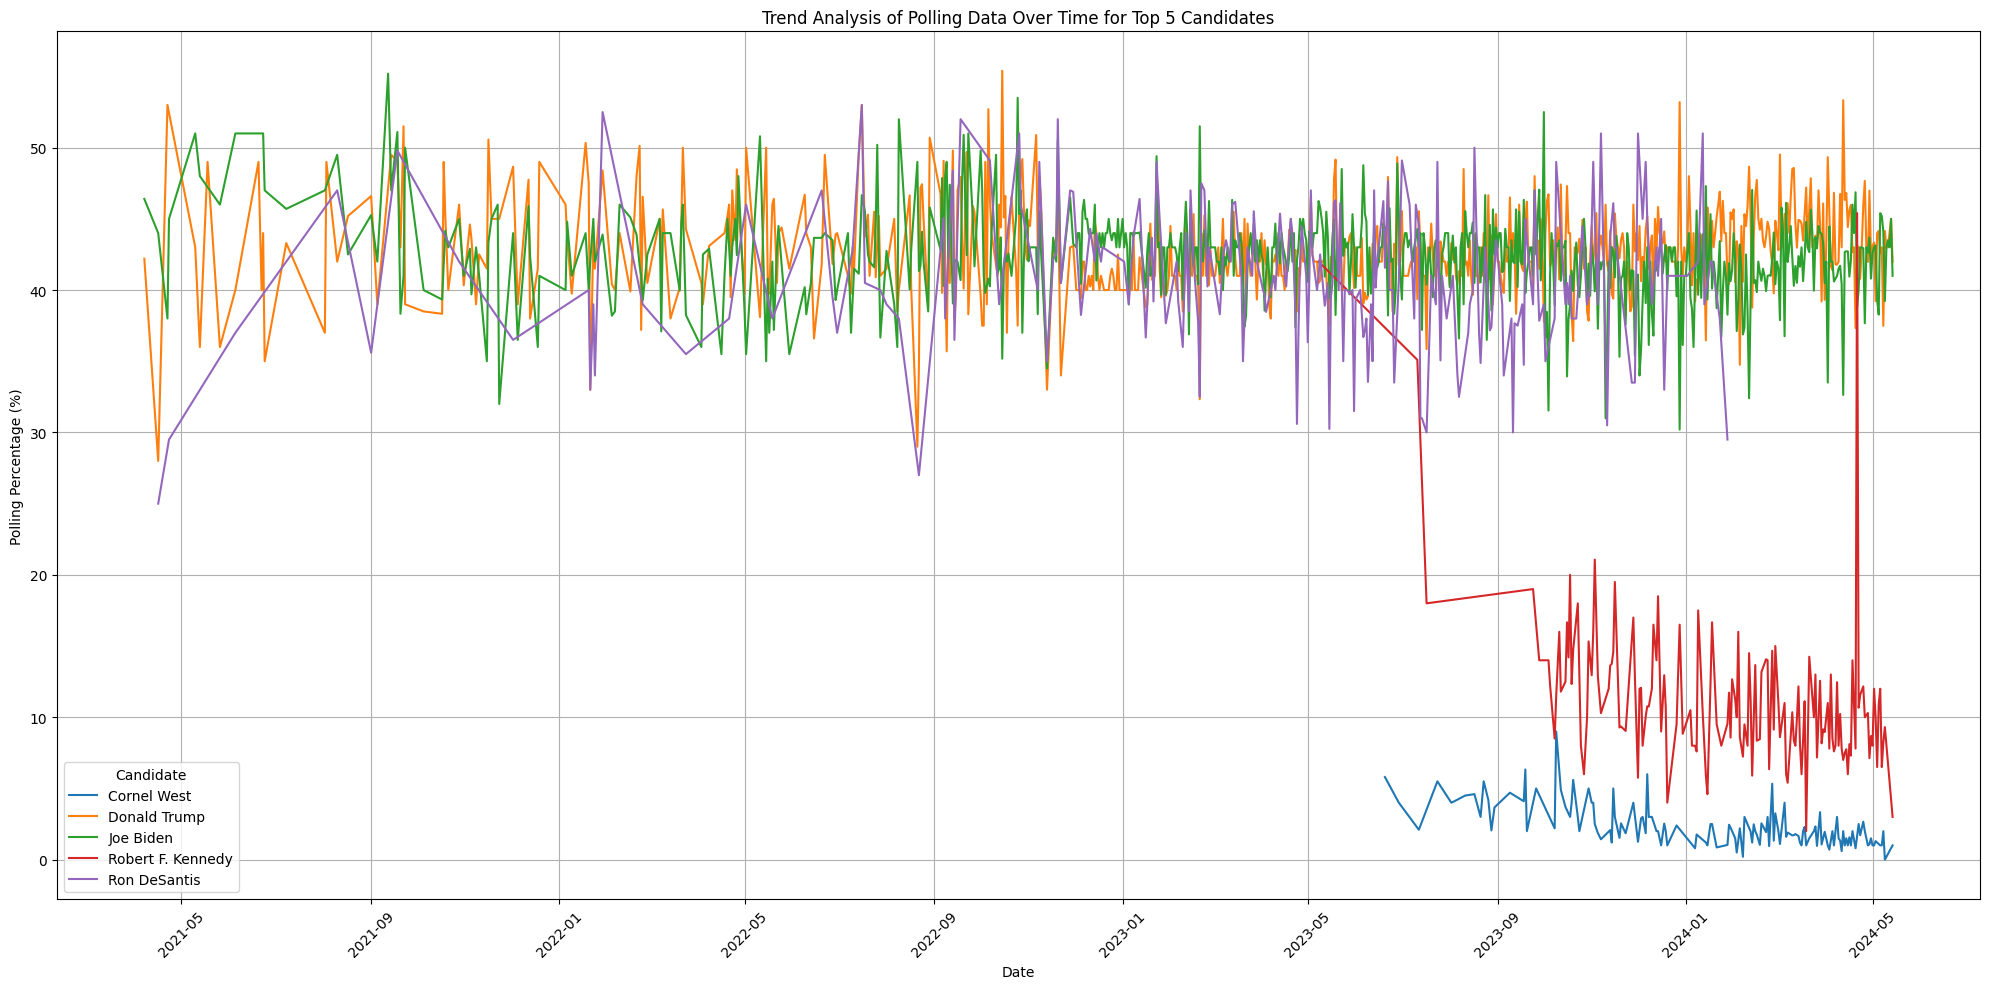

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(trend_df, x="end_date", y="pct", hue="candidate_name")
plt.title("Trend Analysis of Polling Data Over Time for Top 5 Candidates")
plt.xlabel("Date")
plt.ylabel("Polling Percentage (%)")
plt.legend(title="Candidate")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()


In [46]:
pollster_performance = may_polls_df.groupby('pollster')[['numeric_grade', 'pollscore', 'pct']].mean().reset_index()
top_pollsters = pollster_performance.sort_values(by='numeric_grade', ascending=False)
top_pollsters.head(10)


,pollster,numeric_grade,pollscore,pct
0,ABC/Washington Post,3.0,-1.1,45.666667
115,Siena/NYT,3.0,-1.5,33.711111
71,Marquette Law School,3.0,-1.0,39.000000
38,Emerson,2.9,-1.1,34.718865
70,Marist,2.9,-0.9,37.193548
28,Data Orbital,2.9,-0.9,30.133333
142,University of Massachusetts Lowell/YouGov,2.9,-0.9,27.111111
122,Suffolk,2.9,-1.0,29.730864
137,U. Massachusetts - Lowell,2.9,-0.9,45.166667
153,YouGov Blue,2.9,-1.1,38.304348


In [47]:
correlation = pollster_performance[['numeric_grade', 'pollscore', 'pct']].corr()
print(correlation)


               numeric_grade  pollscore       pct
numeric_grade       1.000000  -0.862318 -0.127777
pollscore          -0.862318   1.000000  0.096664
pct                -0.127777   0.096664  1.000000


In [70]:
party_popularity_by_state = may_polls_df.groupby(['state', 'party'])['pct'].mean().reset_index()
party_popularity_by_state

,state,party,pct
0,Alabama,DEM,33.925000
1,Alabama,IND,43.700000
2,Alabama,REP,56.425000
3,Alaska,DEM,35.387500
4,Alaska,GRE,1.000000
...,...,...,...
191,Wisconsin,LIB,0.750000
192,Wisconsin,REP,44.416854
193,Wyoming,DEM,17.500000
194,Wyoming,IND,51.150000


In [ ]:
states = party_popularity_by_state['state'].unique()
parties = party_popularity_by_state['party'].unique()
num_states = len(states)
n_cols = 5
n_rows = (num_states // n_cols) + 1




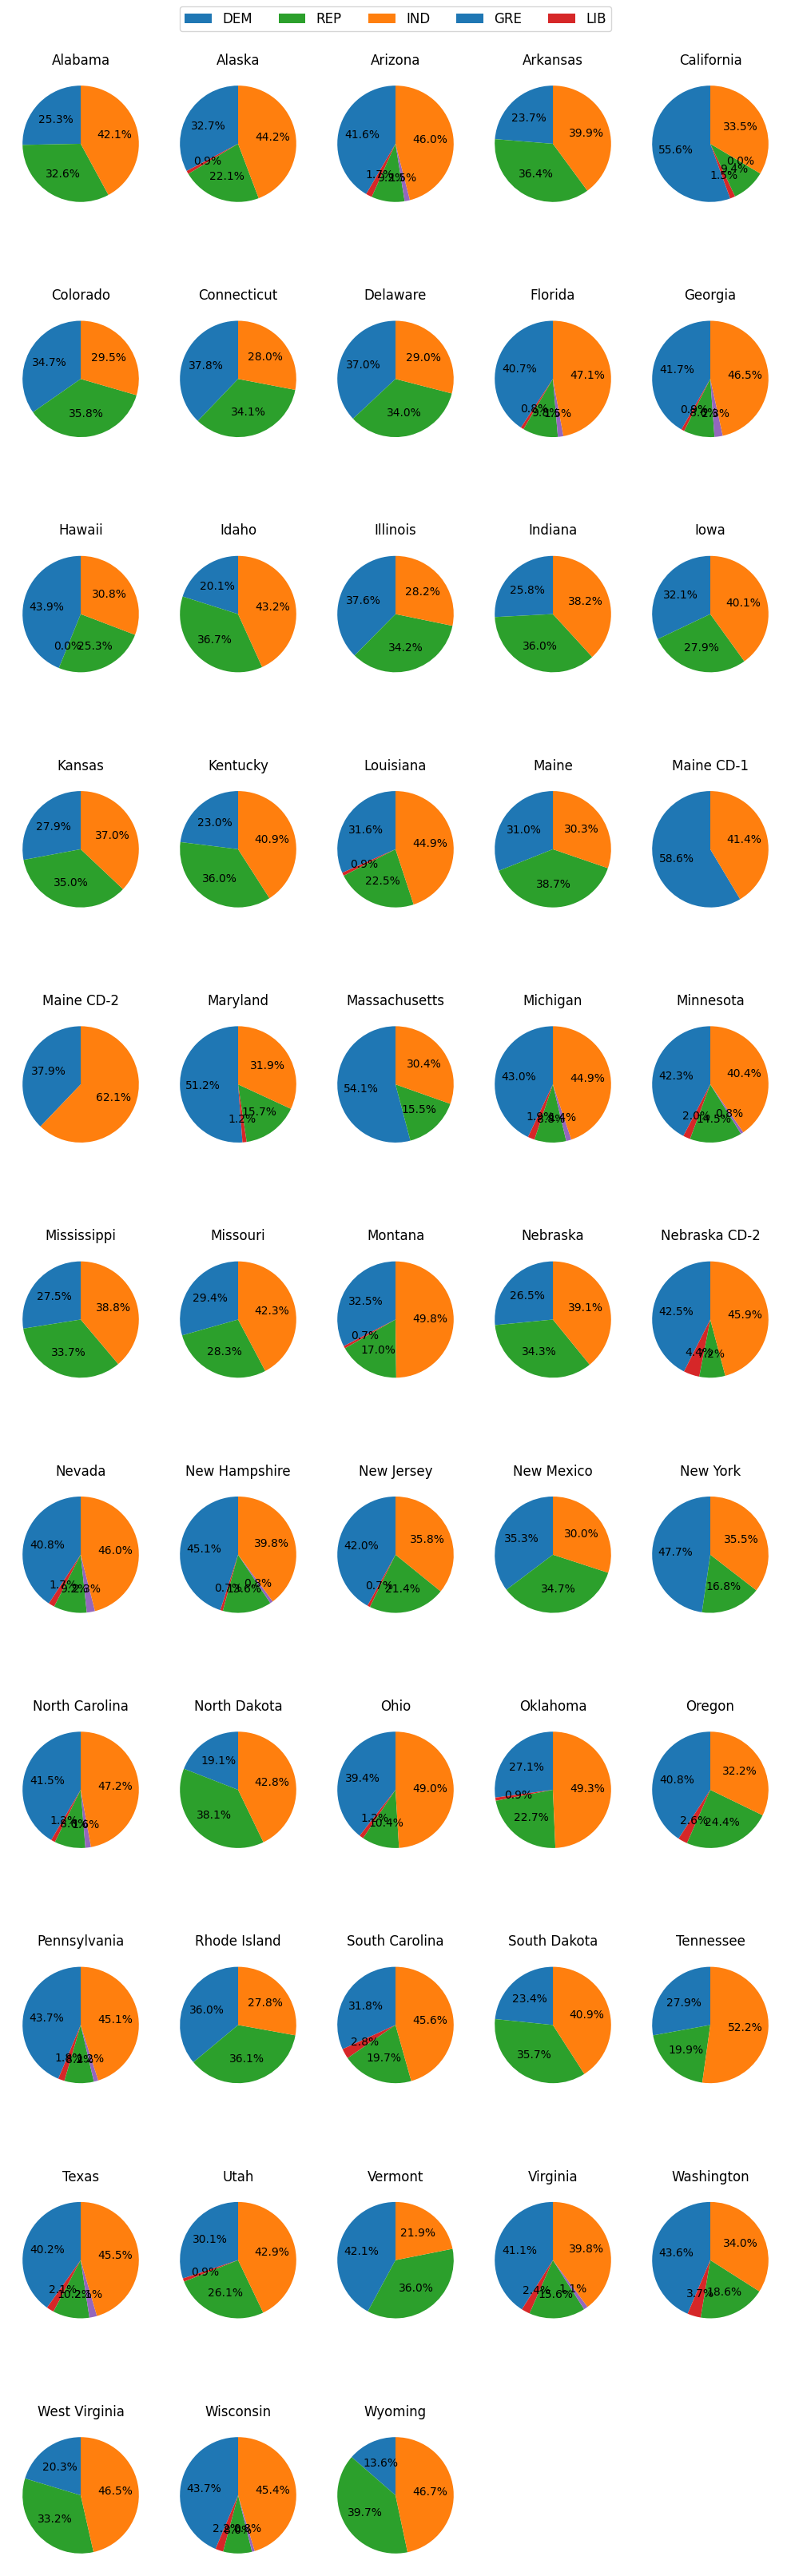

In [98]:
candidate_popularity_by_state = may_polls_df.groupby(['state', 'party'])['pct'].mean().reset_index()


unique_states = candidate_popularity_by_state['state'].unique()
party_names = candidate_popularity_by_state['party'].unique()
# Determine the number of unique states
num_states = len(unique_states)
n_cols = 5  # Number of columns for the subplot grid
n_rows = (num_states // n_cols) + 1  # Calculate rows based on the number of states

party_colors = {
    'DEM': '#1f77b4',  # Blue
    'REP': '#ff7f0e',  # Red
    'IND': '#2ca02c',  # Green
    'GRE': '#d62728',  # Dark Red
    'LIB': '#9467bd'   # Purple
}


# Create the subplot figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))
 # Decrease hspace to reduce the gap between rows

axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through each state and plot a pie chart using consistent colors
for i, state in enumerate(unique_states):
    state_data = party_popularity_by_state[party_popularity_by_state['state'] == state]

    # Skip states with insufficient data
    if len(state_data) < 2:
        continue

    # Extract party names and their respective percentages
    parties = state_data['party']
    percentages = state_data['pct']
    colors = [party_colors.get(party, '#7f7f7f') for party in parties]

    # Create the pie chart with consistent colors
    ax = axes[i]
    ax.pie(percentages, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"{state}")

# Add a legend for all parties outside the subplots
fig.legend(party_colors.keys(), loc='upper center', ncol=5, fontsize=12)

# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.01, wspace=0.2)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the figure
fig.tight_layout()
plt.show()


In [97]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Determine the number of unique states
num_states = len(unique_states)
n_cols = 5  # Number of columns for the subplot grid
n_rows = (num_states // n_cols) + 1  # Calculate rows based on the number of states

# Create a subplot figure with pie chart specs
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=unique_states,
    specs=[[{'type': 'pie'} for _ in range(n_cols)] for _ in range(n_rows)]
)

# Iterate through each state and add a pie chart to the subplot
for idx, state in enumerate(unique_states):
    row = (idx // n_cols) + 1
    col = (idx % n_cols) + 1

    # Filter data for the current state
    state_data = candidate_popularity_by_state[candidate_popularity_by_state['state'] == state]

    # Skip states with insufficient data
    if len(state_data) < 2:
        continue

    # Extract party names and their respective percentages
    parties = state_data['party']
    percentages = state_data['pct']
    colors = [party_colors.get(party, '#7f7f7f') for party in parties]

    # Add a pie chart for the current state
    fig.add_trace(
        go.Pie(
            labels=parties,
            values=percentages,
            marker=dict(colors=colors),
            hovertemplate="<b>%{label}</b><br>Popularity: %{value:.1f}%",
            textinfo='none'  # Hide text inside the pie
        ),
        row=row, col=col
    )

# Update the layout
fig.update_layout(
    title_text="Candidate Popularity by State",
    height=n_rows * 300,
    showlegend=True,
    legend=dict(title="Party", orientation="h", x=0.5, xanchor="center")
)

# Display the figure
fig.show()


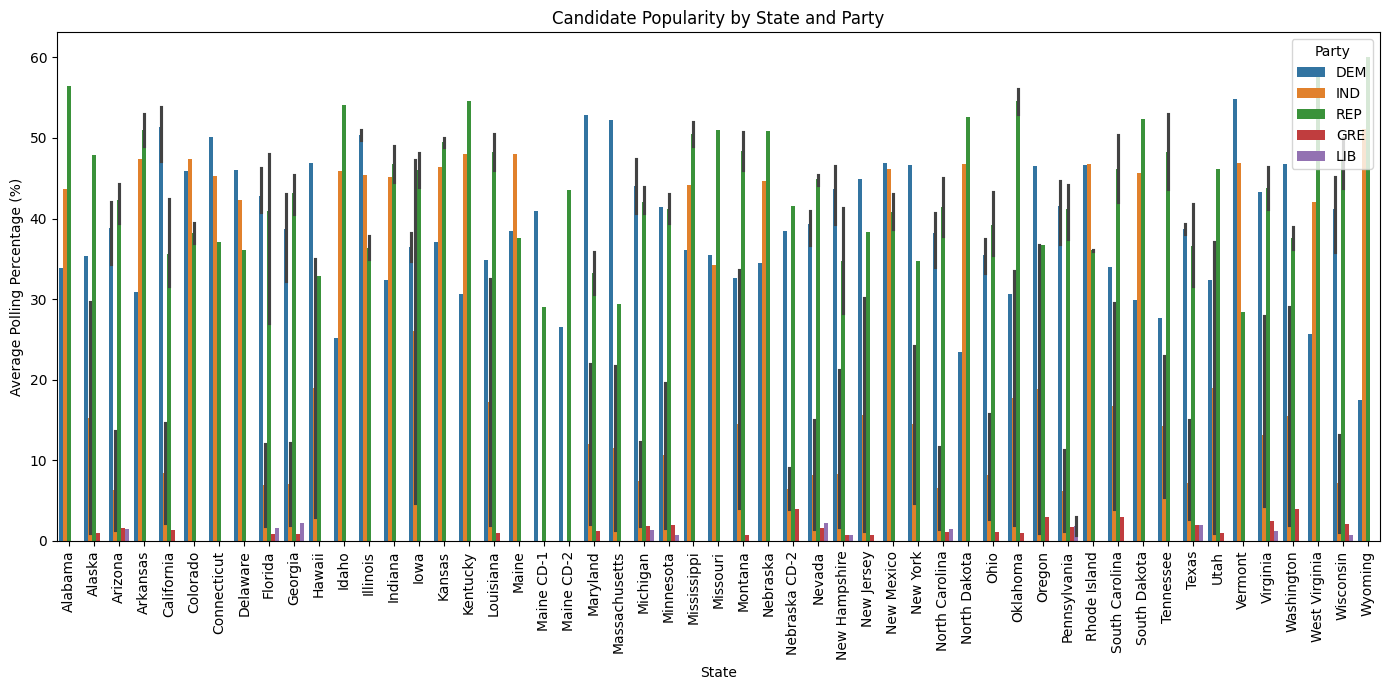

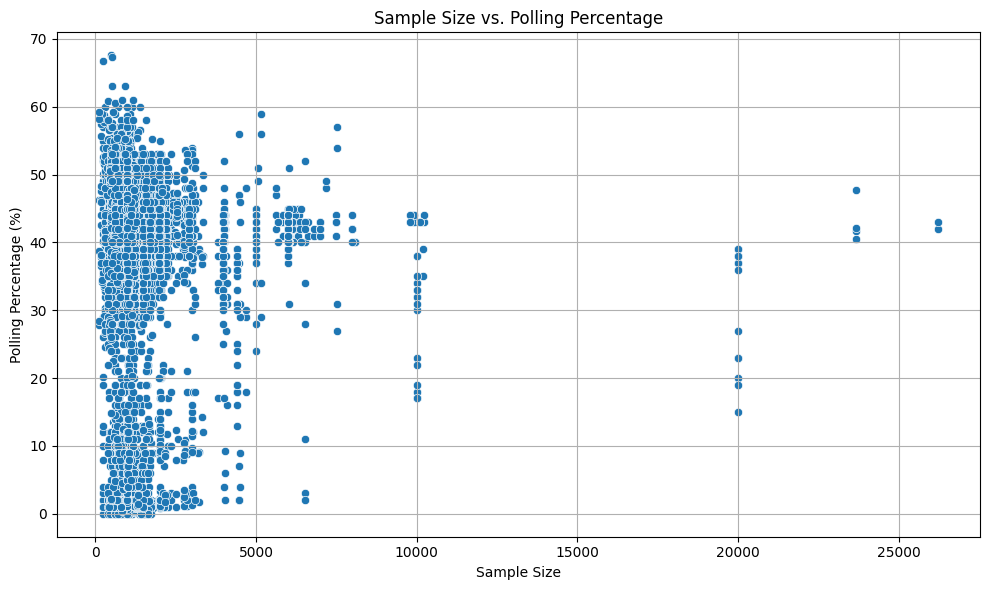

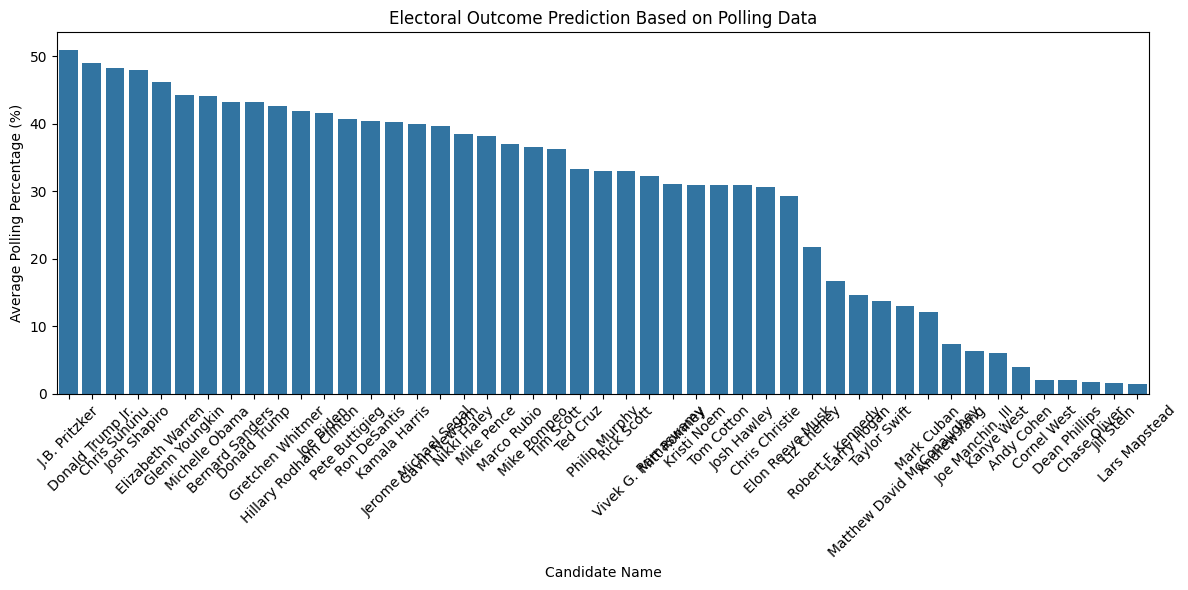

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis 3: Candidate Popularity by Party and State
# Calculate the mean polling percentage by state, party, and candidate
candidate_popularity_by_state = may_polls_df.groupby(['state', 'party', 'candidate_name'])['pct'].mean().reset_index()

# Analysis 4: Sample Size Impact Analysis
# Calculate the correlation between sample size and polling percentage
sample_size_analysis = may_polls_df[['sample_size', 'pct']].dropna()
sample_size_correlation = sample_size_analysis.corr().loc['sample_size', 'pct']

# Analysis 5: Electoral Outcome Prediction
# Aggregate polling data by candidate name to estimate overall popularity
electoral_outcome = may_polls_df.groupby('candidate_name')['pct'].mean().sort_values(ascending=False).reset_index()

# 1. Visualize Candidate Popularity by State and Party
plt.figure(figsize=(14, 7))
sns.barplot(data=candidate_popularity_by_state, x='state', y='pct', hue='party')
plt.title("Candidate Popularity by State and Party")
plt.xlabel("State")
plt.ylabel("Average Polling Percentage (%)")
plt.xticks(rotation=90)
plt.legend(title="Party")
plt.tight_layout()
plt.show()

# 2. Visualize the relationship between sample size and polling percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_size_analysis, x='sample_size', y='pct')
plt.title("Sample Size vs. Polling Percentage")
plt.xlabel("Sample Size")
plt.ylabel("Polling Percentage (%)")
plt.grid()
plt.tight_layout()
plt.show()

# 3. Display Electoral Outcome Prediction
plt.figure(figsize=(12, 6))
sns.barplot(data=electoral_outcome, x='candidate_name', y='pct')
plt.title("Electoral Outcome Prediction Based on Polling Data")
plt.xlabel("Candidate Name")
plt.ylabel("Average Polling Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
poll_df = pd.read_csv("president_polls.csv")
poll_df.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,43.2
1,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,47.4
2,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,36.7
3,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,43.4
4,84924,1102,Emerson,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel/Email,...,11/5/24,general,False,False,NaN,IND,Kennedy,31042,Robert F. Kennedy,6.5


In [12]:
display(poll_df.describe())
display(poll_df.describe(include=['O']))

,poll_id,pollster_id,pollster_rating_id,transparency_score,sponsor_candidate_id,question_id,sample_size,subpopulation,source,race_id,cycle,seat_number,seat_name,ranked_choice_round,candidate_id,pct
count,4701.000000,4701.000000,4701.000000,1483.000000,12.000000,4701.000000,4683.000000,0.0,201.0,4701.000000,4701.0,4701.0,0.0,0.0,4701.000000,4701.000000
mean,82617.245054,1180.246118,318.478196,6.326028,28577.333333,173615.275899,1989.485159,NaN,538.0,8890.099766,2024.0,0.0,NaN,NaN,18689.582217,40.181306
std,2162.172796,461.429597,193.146211,2.303128,5571.600282,11268.228945,1979.608948,NaN,0.0,45.692064,0.0,0.0,NaN,NaN,3391.162062,8.982626
min,74681.000000,57.000000,3.000000,1.000000,16651.000000,140691.000000,300.000000,NaN,538.0,8749.000000,2024.0,0.0,NaN,NaN,16638.000000,0.700000
25%,81725.000000,1075.000000,195.000000,4.000000,30788.000000,165909.000000,1000.000000,NaN,538.0,8889.000000,2024.0,0.0,NaN,NaN,16651.000000,38.000000
50%,83142.000000,1189.000000,260.000000,6.000000,30951.500000,175314.000000,1180.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,16661.000000,42.000000
75%,84382.000000,1562.000000,448.000000,9.000000,31061.000000,183509.000000,2059.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,19368.000000,44.200000
max,84924.000000,1832.000000,809.000000,10.000000,31061.000000,188203.000000,26230.000000,NaN,538.0,8914.000000,2024.0,0.0,NaN,NaN,31116.000000,67.600000


,pollster,sponsor_ids,sponsors,display_name,pollster_rating_name,fte_grade,methodology,state,start_date,end_date,...,notes,url,internal,partisan,office_type,election_date,stage,party,answer,candidate_name
count,4701,1744,1744,4701,4701,4523,4604,1321,4701,4701,...,52,4699,10,240,4701,4701,4701,4701,4701,4701
unique,115,113,113,115,109,12,35,46,551,552,...,6,747,1,4,1,1,1,7,43,43
top,Morning Consult,763,Harvard CAPS,Morning Consult,Morning Consult,B-,Online Panel,Georgia,10/22/23,11/3/23,...,split sample,https://pro.morningconsult.com/analysis/2024-g...,True,REP,U.S. President,11/5/24,general,DEM,Biden,Joe Biden
freq,900,213,213,900,900,1160,2726,118,134,154,...,20,418,10,162,4701,4701,4701,2226,1980,1980


In [43]:
import pandas as pd
import glob
import os

path = r"C:\Users\KT\Documents\ds_portfolio\kamala_vs_harris\*.csv"
csv_files = glob.glob(path)

dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}
print("dfs:", dfs.keys())


dfs: dict_keys(['candidates.csv', 'delegate_counts.csv', 'favorability_polls.csv', 'generic_ballot_polls.csv', 'president_polls.csv', 'primaries_and_caucuses.csv'])
         party                 name date_announced date_withdrawn
0     democrat        Dean Phillips     10/26/2023       3/6/2024
1     democrat  Marianne Williamson       3/4/2023       2/7/2024
2     democrat            Joe Biden      4/25/2023       7/2/2024
3     democrat        Kamala Harris       7/1/2024            NaN
4  independent          Cornel West       6/5/2023            NaN


In [49]:
for file_name, df in dfs.items():
    print(f"{file_name}:")
    print(df.head())
    print("-" * 40) 


candidates.csv:
         party                 name date_announced date_withdrawn
0     democrat        Dean Phillips     10/26/2023       3/6/2024
1     democrat  Marianne Williamson       3/4/2023       2/7/2024
2     democrat            Joe Biden      4/25/2023       7/2/2024
3     democrat        Kamala Harris       7/1/2024            NaN
4  independent          Cornel West       6/5/2023            NaN
----------------------------------------
delegate_counts.csv:
     Date             State  Total delegates  Trump  Haley  DeSantis  \
0  15-Jan            Iowa >               40     20      8         9   
1  23-Jan   New Hampshire >               22     13      9         0   
2   8-Feb          Nevada >               26     26      0         0   
3   8-Feb  Virgin Islands >                4      4      0         0   
4  24-Feb  South Carolina >               50     47      3         0   

   Ramaswamy  
0          3  
1          0  
2          0  
3          0  
4          0  
---

In [51]:
import pandas as pd
import glob
import os

path = r"C:\Users\KT\Documents\ds_portfolio\kamala_vs_harris\approval_ratings\*.csv"
csv_files = glob.glob(path)

dfs2 = {os.path.basename(file): pd.read_csv(file) for file in csv_files}
for file_name, df in dfs2.items():
    print(f"{file_name}:")
    print(df.head())
    print("-" * 40) 


approval_averages.csv:
  politician/institution        date      answer  pct_estimate         lo  \
0               Congress  2024-04-17     Approve     19.811603  13.068704   
1               Congress  2024-04-17  Disapprove     68.511628  61.063727   
2               Congress  2024-04-16     Approve     19.813241  13.070383   
3               Congress  2024-04-16  Disapprove     68.510144  61.062241   
4               Congress  2024-04-15     Approve     20.616881  13.866625   

          hi  
0  26.554502  
1  75.959530  
2  26.556099  
3  75.958047  
4  27.367137  
----------------------------------------
approval_topline.csv:
  politician    end_date       polltype   subgroup  approve_estimate  \
0  Joe Biden  2024-04-19  potus-approve  All polls         39.033631   
1  Joe Biden  2024-04-18  potus-approve  All polls         39.043815   
2  Joe Biden  2024-04-17  potus-approve  All polls         38.951108   
3  Joe Biden  2024-04-16  potus-approve  All polls         39.614517   
4